## IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import tensorflow as tf
import keras
import random
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

2023-04-25 20:19:25.612571: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Classification using a DNN without convolution layers

In [2]:
# Unpack and load the data
(X_train, Y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
categories = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [4]:
# Normalize pixel values to be between 0 and 1
X_train, x_test = X_train / 255.0, x_test / 255.0

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# One-hot encode the labels
Y_train = to_categorical(Y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
# Create the deep neural network model
dnn_model = Sequential([
    Dense(1024, activation='relu', input_shape=(3072,)),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

2023-04-25 20:19:30.182320: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# View the summary of our DNN model
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [7]:
# Compile the model
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, restore_best_weights=True)

In [9]:
# Train the model
DNN_M = dnn_model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test),
             callbacks=[early_stopping])

Epoch 1/50
391/391 [==============================] - 8s 20ms/step - loss: 2.0374 - accuracy: 0.2428 - val_loss: 1.8625 - val_accuracy: 0.3205
Epoch 2/50
391/391 [==============================] - 8s 20ms/step - loss: 1.8651 - accuracy: 0.3216 - val_loss: 1.7538 - val_accuracy: 0.3731
Epoch 3/50
391/391 [==============================] - 8s 19ms/step - loss: 1.8051 - accuracy: 0.3480 - val_loss: 1.7222 - val_accuracy: 0.3754
Epoch 4/50
391/391 [==============================] - 8s 20ms/step - loss: 1.7604 - accuracy: 0.3644 - val_loss: 1.6936 - val_accuracy: 0.4099
Epoch 5/50
391/391 [==============================] - 8s 19ms/step - loss: 1.7321 - accuracy: 0.3774 - val_loss: 1.6239 - val_accuracy: 0.4264
Epoch 6/50
391/391 [==============================] - 8s 20ms/step - loss: 1.6982 - accuracy: 0.3892 - val_loss: 1.6392 - val_accuracy: 0.4200
Epoch 7/50
391/391 [==============================] - 8s 20ms/step - loss: 1.6856 - accuracy: 0.3964 - val_loss: 1.5860 - val_accuracy: 0.4402

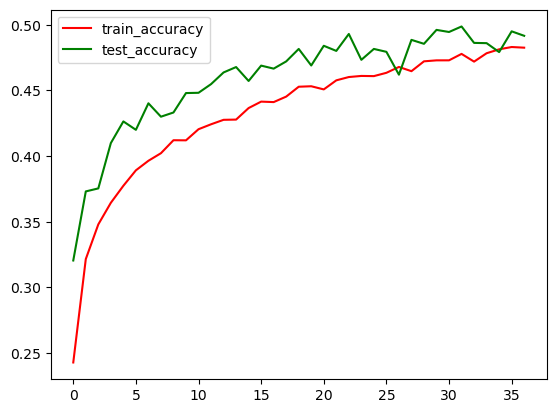

In [10]:
# Plot for training and testing accuracy of the DNN Model
plt.plot(DNN_M.history['accuracy'], label='train_accuracy', color='red')
plt.plot(DNN_M.history['val_accuracy'], label='test_accuracy', color='green')
plt.legend()

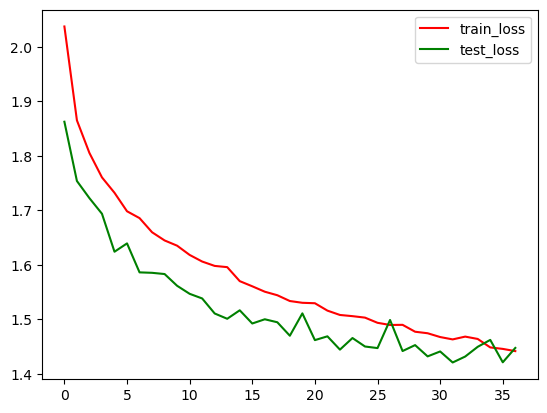

In [46]:
# Plot for training and testing loss of DNN Model
plt.plot(DNN_M.history['loss'], label='train_loss', color='red')
plt.plot(DNN_M.history['val_loss'], label='test_loss', color='green')
plt.legend()

In [48]:
#Testing loss, accuracy and training time of DNN model
loss, accuracy = min(DNN_M.history['val_loss']), max(DNN_M.history['val_accuracy'])

print(f"Test accuracy: {accuracy:.2%}")
print(f"Test loss: {loss:.4f}")
print(f"Training time: {37*8} seconds") #37 epochs, each epoch took an average of 8 seconds

Test accuracy: 49.87%
Test loss: 1.4206
Training time: 296 seconds


In [11]:
# Obtain the true labels from one-hot encoded test_labels
true_labels = np.argmax(y_test, axis=1)

# Get the predicted labels from the model
predicted_probabilities = dnn_model.predict(x_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion matrix:\n", conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

313/313 [==============================] - 2s 7ms/step
Confusion matrix:
 [[592  14  42  31  38   8  29  38 153  55]
 [ 54 558   8  26  15  13  17  24  88 197]
 [101  21 258  80 242  57 133  70  21  17]
 [ 29  21  50 335  96 144 181  55  44  45]
 [ 81   7  85  54 486  24 147  75  28  13]
 [ 25  10  72 230 102 315 104  86  24  32]
 [  8   9  47  70 141  26 648  16  13  22]
 [ 51  16  39  69 126  49  38 541  14  57]
 [128  39   7  31  23  10  12  12 687  51]
 [ 45 146   4  37  14  11  30  41 105 567]]
Accuracy: 0.4987


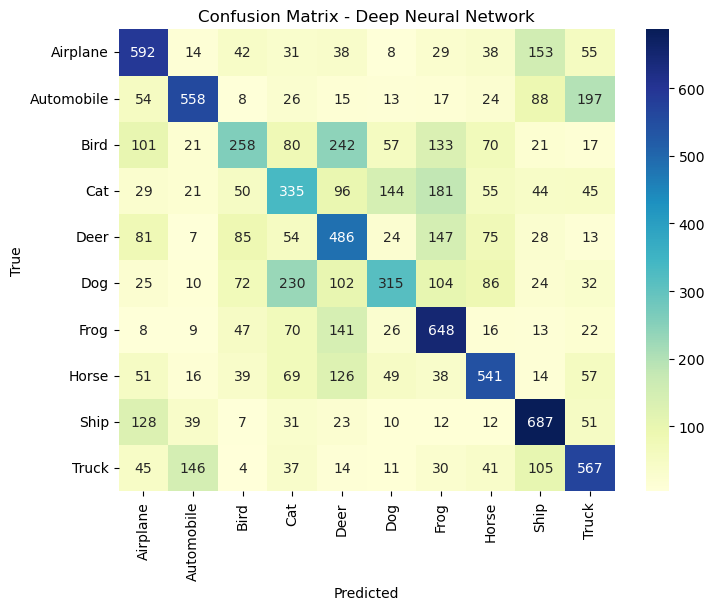

In [49]:
# Visualizing the prediction accuracy using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Deep Neural Network")
plt.show()

## END OF DNN MODEL CLASSIFICATION

## -------------------------------------------

## CIFAR-10 IMAGE CLASSIFICATION USING CNN

In [13]:
# Unpack and load the data
(X_train, Y_train), (x_test, y_test) = cifar10.load_data()

In [14]:
# Check the dimensions of our data
X_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [15]:
# Check the shape of the labels
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
# Normalize pixel values to be between 0 and 1
X_train, x_test = X_train/255.0, x_test/255.0

# Flatten the labels to reduce it from 2D to a 1D array
Y_train, y_test = Y_train.flatten(), y_test.flatten()

In [17]:
# Ensure the images are normalized
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [18]:
# Ensure the label shape is correct (1D array)
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [19]:
# Building the first CNN model (for fitting without data augmentation)
cnn_model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dropout(0.2),
    
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(len(categories), activation='softmax')
])

In [20]:
# Building the second CNN model (for fitting with data augmentation)
cnn_model2 = Sequential([
    Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dropout(0.2),
    
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(len(categories), activation='softmax')
])

In [21]:
# View the summary of our CNN model
cnn_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                      

In [22]:
# Compile the first model
cnn_model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Compile the second model
cnn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Fit the first model
CNN_M1 = cnn_model1.fit(X_train, Y_train, validation_data=(x_test, y_test), 
                        epochs=50, batch_size=64, callbacks=[early_stopping])

Epoch 1/50
782/782 [==============================] - 87s 111ms/step - loss: 1.3197 - accuracy: 0.5386 - val_loss: 1.2883 - val_accuracy: 0.5587
Epoch 2/50
782/782 [==============================] - 86s 110ms/step - loss: 0.8463 - accuracy: 0.7026 - val_loss: 0.8879 - val_accuracy: 0.6888
Epoch 3/50
782/782 [==============================] - 86s 110ms/step - loss: 0.6766 - accuracy: 0.7650 - val_loss: 0.8605 - val_accuracy: 0.7149
Epoch 4/50
782/782 [==============================] - 86s 110ms/step - loss: 0.5758 - accuracy: 0.8000 - val_loss: 0.6976 - val_accuracy: 0.7657
Epoch 5/50
782/782 [==============================] - 89s 114ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.6299 - val_accuracy: 0.7875
Epoch 6/50
782/782 [==============================] - 87s 111ms/step - loss: 0.4231 - accuracy: 0.8534 - val_loss: 0.6007 - val_accuracy: 0.8072
Epoch 7/50
782/782 [==============================] - 87s 111ms/step - loss: 0.3541 - accuracy: 0.8762 - val_loss: 0.6139 - val_ac

In [25]:
# Data augmentation for the second model
batch_size = 64
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 
train_generator = datagen.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

# Fit the second model
CNN_M2 = cnn_model2.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50, callbacks=[early_stopping])

Epoch 1/50
781/781 [==============================] - 90s 115ms/step - loss: 1.4686 - accuracy: 0.4836 - val_loss: 1.2836 - val_accuracy: 0.5457
Epoch 2/50
781/781 [==============================] - 244s 313ms/step - loss: 1.0208 - accuracy: 0.6401 - val_loss: 0.8866 - val_accuracy: 0.6933
Epoch 3/50
781/781 [==============================] - 90s 115ms/step - loss: 0.8466 - accuracy: 0.7069 - val_loss: 0.8832 - val_accuracy: 0.6980
Epoch 4/50
781/781 [==============================] - 90s 115ms/step - loss: 0.7525 - accuracy: 0.7393 - val_loss: 0.7214 - val_accuracy: 0.7620
Epoch 5/50
781/781 [==============================] - 90s 115ms/step - loss: 0.6791 - accuracy: 0.7672 - val_loss: 0.8127 - val_accuracy: 0.7305
Epoch 6/50
781/781 [==============================] - 90s 115ms/step - loss: 0.6244 - accuracy: 0.7860 - val_loss: 0.6708 - val_accuracy: 0.7762
Epoch 7/50
781/781 [==============================] - 90s 115ms/step - loss: 0.5819 - accuracy: 0.8012 - val_loss: 0.7297 - val_a

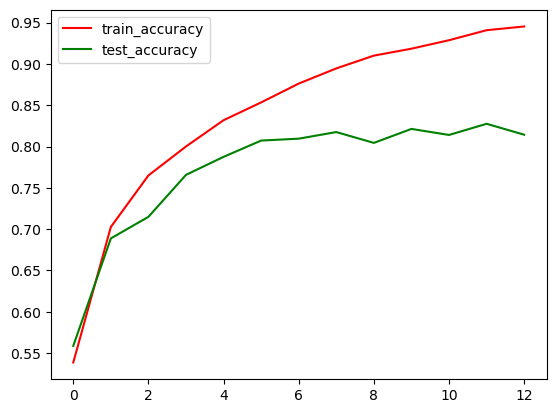

In [26]:
# Plot for training and testing accuracy of CNN Model 1
plt.plot(CNN_M1.history['accuracy'], label='train_accuracy', color='red')
plt.plot(CNN_M1.history['val_accuracy'], label='test_accuracy', color='green')
plt.legend()

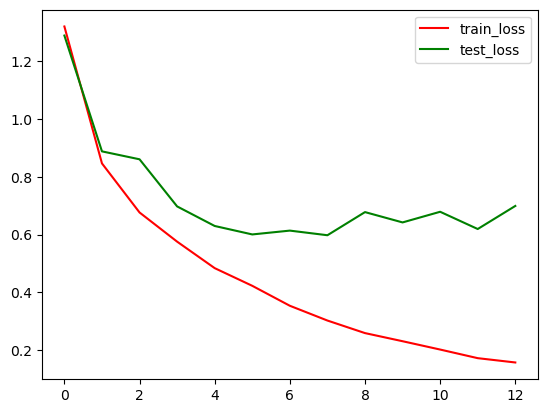

In [32]:
# Plot for training and testing loss of CNN Model 1
plt.plot(CNN_M1.history['loss'], label='train_loss', color='red')
plt.plot(CNN_M1.history['val_loss'], label='test_loss', color='green')
plt.legend()

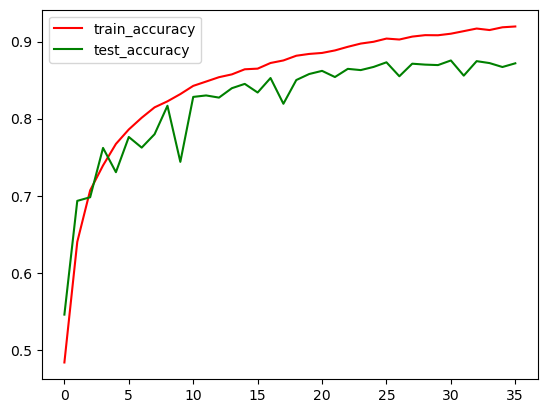

In [27]:
# Plot for training and testing accuracy of CNN Model 2
plt.plot(CNN_M2.history['accuracy'], label='train_accuracy', color='red')
plt.plot(CNN_M2.history['val_accuracy'], label='test_accuracy', color='green')
plt.legend()

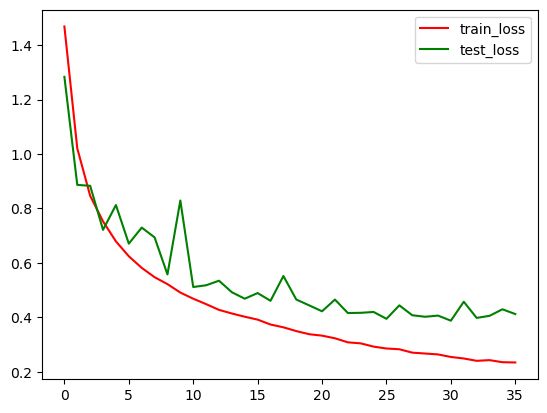

In [33]:
# Plot for training and testing loss of CNN Model 2
plt.plot(CNN_M2.history['loss'], label='train_loss', color='red')
plt.plot(CNN_M2.history['val_loss'], label='test_loss', color='green')
plt.legend()

In [44]:
#Testing loss, accuracy and training time of CNN model 1 (without data augmentation)
test_loss, test_accuracy = min(CNN_M1.history['val_loss']), max(CNN_M1.history['val_accuracy'])

print(f"Test accuracy: {test_accuracy:.2%}")
print(f"Test loss: {test_loss:.4f}")
print(f"Training time: {13*87} seconds") #13 epochs, each epoch took an average of 87 seconds

Test accuracy: 82.75%
Test loss: 0.5979
Training time: 1131 seconds


In [45]:
#Testing loss, accuracy and training time of CNN model 2 (with data augmentation)
loss, accuracy = min(CNN_M2.history['val_loss']), max(CNN_M2.history['val_accuracy'])

print(f"Test accuracy: {accuracy:.2%}")
print(f"Test loss: {loss:.4f}")
print(f"Training time: {36*90} seconds") #36 epochs, each epoch took an average of 90 seconds

Test accuracy: 87.55%
Test loss: 0.3878
Training time: 3240 seconds


In [28]:
# One-hot encode the test labels
y_test = to_categorical(y_test, num_classes=10)

In [29]:
# Obtain the true labels from one-hot encoded test_labels
true_labels = np.argmax(y_test, axis=1)

# Get the predicted labels from CNN model 1
predicted_probabilities1 = cnn_model1.predict(x_test)
predicted_labels1 = np.argmax(predicted_probabilities1, axis=1)

# Get the predicted labels from CNN model 2
predicted_probabilities2 = cnn_model2.predict(x_test)
predicted_labels2 = np.argmax(predicted_probabilities2, axis=1)

# Compute the confusion matrix for CNN model 1
conf_matrix1 = confusion_matrix(true_labels, predicted_labels1)
print("Confusion matrix:\n", conf_matrix1)

# Calculate accuracy for CNN model 1
accuracy1 = accuracy_score(true_labels, predicted_labels1)
print(f"Accuracy: {accuracy1:.4f}")

# Compute the confusion matrix for CNN model 2
conf_matrix2 = confusion_matrix(true_labels, predicted_labels2)
print("Confusion matrix:\n", conf_matrix2)

# Calculate accuracy for CNN model 2
accuracy2 = accuracy_score(true_labels, predicted_labels2)
print(f"Accuracy: {accuracy2:.4f}")

313/313 [==============================] - 7s 22ms/step
Confusion matrix:
 [[878  10   8  13  10   8   1   7  40  25]
 [  6 902   1   3   1   2   2   1  13  69]
 [ 74   4 689  70  58  42  33  15  10   5]
 [ 19   9  37 726  31  87  43  19  14  15]
 [ 20   4  36  70 786  20  23  33   5   3]
 [ 13   3  20 170  25 722   9  28   2   8]
 [  9   8  30  65  22  15 832   5  12   2]
 [ 15   3  12  52  35  27   4 842   2   8]
 [ 48  10   3   4   1   1   2   3 892  36]
 [ 26  36   1   7   2   4   0   4  14 906]]
Accuracy: 0.8175
Confusion matrix:
 [[872   9  35  14   6   5   5   2  25  27]
 [  3 935   1   1   2   1   2   0   7  48]
 [ 19   0 824  35  38  31  38   5   3   7]
 [  5   3  29 745  35  96  65   7   4  11]
 [  1   1  31  18 887  15  32  14   1   0]
 [  5   0  17  86  26 827  26   6   2   5]
 [  2   0  16  25   6   4 944   0   1   2]
 [  6   0  13  26  30  43  18 853   2   9]
 [ 29  13   5   4   0   1   5   2 916  25]
 [  4  28   1   2   0   2   3   0   8 952]]
Accuracy: 0.8755


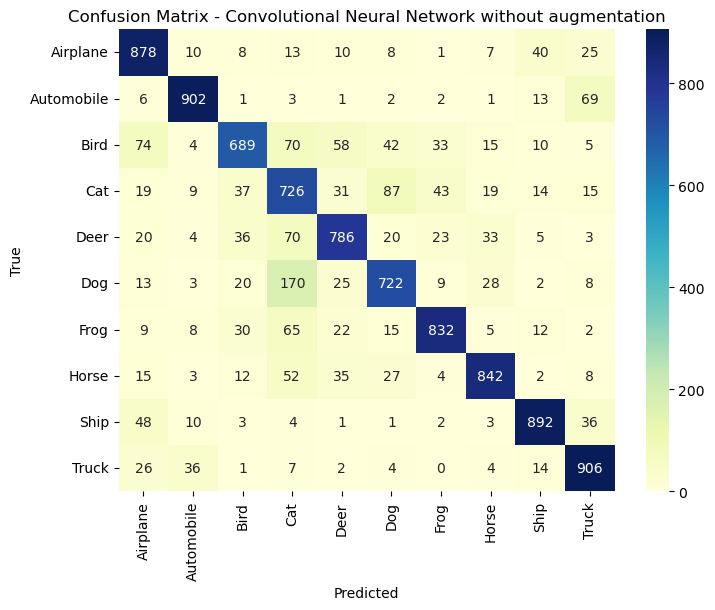

In [30]:
# Visualizing the prediction accuracy using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="YlGnBu", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Convolutional Neural Network without augmentation")
plt.show()

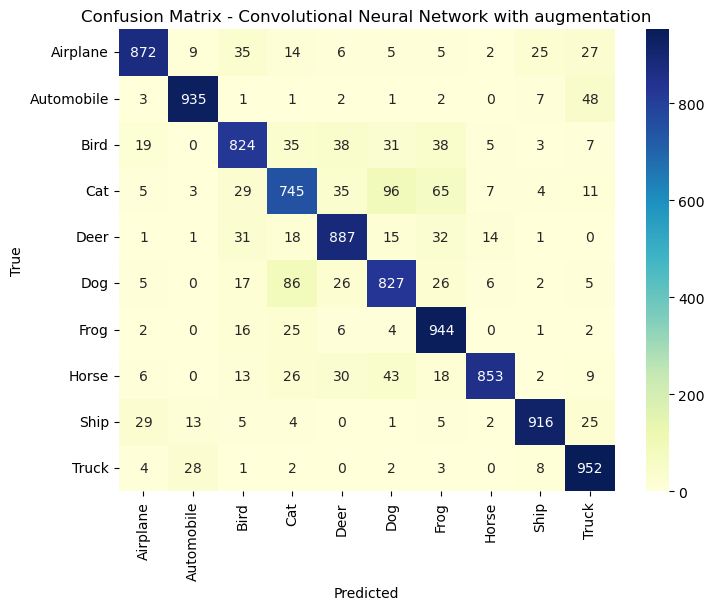

In [31]:
# Visualizing the prediction accuracy using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="YlGnBu", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Convolutional Neural Network with augmentation")
plt.show()